In [1]:
# === Standard Library ===
import math
import random
import time
import heapq
import itertools
from collections import defaultdict, deque
from itertools import combinations
from typing import Any, Tuple, Dict, List, Set, Sequence, Union
# === Third-Party Libraries ===

# --- Scientific Computing ---
import numpy as np
import pandas as pd
import scipy.sparse as sp
from scipy.optimize import linprog

# --- Plotting ---
import matplotlib.pyplot as plt

# --- Parallel Processing ---
from joblib import Parallel, delayed
from tqdm import tqdm

# --- Graph Processing ---
import networkx as nx

# --- JIT Compilation ---
from numba import njit, prange

In [3]:
path1 = r"C:\Users\btugu\Documents\develop\SCNDP\src\notebooks\Greedy_heuristics\final\results\notebook\csv\Result_heuristics_all_ER_100_10_REGA.csv"
path2 = r"C:\Users\btugu\Documents\develop\SCNDP\src\notebooks\Greedy_heuristics\final\results\notebook\csv\Result_heuristics_all_BA_100_10_REGA.csv"
path3 = r"C:\Users\btugu\Documents\develop\SCNDP\src\notebooks\Greedy_heuristics\final\results\notebook\csv\Result_heuristics_all_SW_100_10_REGA.csv"

df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)
df3 = pd.read_csv(path3)

In [12]:
path4 = r"C:\Users\btugu\Documents\develop\SCNDP\src\notebooks\Greedy_heuristics\final\results\notebook\csv\Result_heuristics_all_ER_100_10_first_5.csv"
path5 = r"C:\Users\btugu\Documents\develop\SCNDP\src\notebooks\Greedy_heuristics\final\results\notebook\csv\Result_heuristics_all_BA_100_10_first_5.csv"
path6 = r"C:\Users\btugu\Documents\develop\SCNDP\src\notebooks\Greedy_heuristics\final\results\notebook\csv\Result_heuristics_all_SW_100_10_first_5.csv"

df4 = pd.read_csv(path4)
df5 = pd.read_csv(path5)
df6 = pd.read_csv(path6)

In [13]:
path7 = r"C:\Users\btugu\Documents\develop\SCNDP\src\notebooks\Greedy_heuristics\final\Result_heuristics_all_ER_100_10_greedies_opt.csv"
path8 = r"C:\Users\btugu\Documents\develop\SCNDP\src\notebooks\Greedy_heuristics\final\Result_heuristics_all_BA_100_10_greedies_opt.csv"
path9 = r"C:\Users\btugu\Documents\develop\SCNDP\src\notebooks\Greedy_heuristics\final\Result_heuristics_all_SW_100_10_greedies_opt.csv"

df7 = pd.read_csv(path7)
df8 = pd.read_csv(path8)
df9 = pd.read_csv(path9)

In [14]:
sub_df1 = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=False)
sub_df1['epc_std'] = 0.0
sub_df1

,model,p,algo,time,epc,epc_std
0,ER,0.0,REGA,7.089809,0.00000,0.0
1,ER,0.1,REGA,17.369625,20.05155,0.0
2,ER,0.2,REGA,43.166783,53.58420,0.0
3,ER,0.3,REGA,135.994652,133.85070,0.0
4,ER,0.4,REGA,490.451155,307.83825,0.0
...,...,...,...,...,...,...
50,SW,1.0,Degree-based,0.001243,3918.65760,0.0
51,SW,1.0,Betweenness,0.028927,4005.00000,0.0
52,SW,1.0,PageRank,0.005488,3915.64800,0.0
53,SW,1.0,Greedy_ES,139.771202,3825.77710,0.0


In [15]:
sub_df2 = pd.concat([df7, df8, df9], ignore_index=False)
sub_df2 

,model,p,algo,time,epc,epc_std
0,ER,0.0,Greedy_ES_initial,2.667464,0.000000,0.000000
1,ER,0.0,Greedy_ES_final,4.447333,0.000000,0.000000
2,ER,0.0,Greedy_MIS_initial,3.612534,0.000000,0.000000
3,ER,0.0,Greedy_MIS_final,55.021285,0.000000,0.000000
4,ER,0.1,Greedy_ES_initial,0.511535,16.433100,0.000000
...,...,...,...,...,...,...
39,SW,0.9,Greedy_MIS_final,6815.039784,3153.802455,231.510795
40,SW,1.0,Greedy_ES_initial,125.428923,3914.103516,0.000000
41,SW,1.0,Greedy_ES_final,706.330089,3654.252000,0.000000
42,SW,1.0,Greedy_MIS_initial,35.278253,3926.261835,82.235033


In [16]:
final_df = pd.concat([sub_df1, sub_df2], ignore_index=False)
final_df.to_csv("Final_df_local_opt_REGA.csv", index=False)
final_df

,model,p,algo,time,epc,epc_std
0,ER,0.0,REGA,7.089809,0.000000,0.000000
1,ER,0.1,REGA,17.369625,20.051550,0.000000
2,ER,0.2,REGA,43.166783,53.584200,0.000000
3,ER,0.3,REGA,135.994652,133.850700,0.000000
4,ER,0.4,REGA,490.451155,307.838250,0.000000
...,...,...,...,...,...,...
39,SW,0.9,Greedy_MIS_final,6815.039784,3153.802455,231.510795
40,SW,1.0,Greedy_ES_initial,125.428923,3914.103516,0.000000
41,SW,1.0,Greedy_ES_final,706.330089,3654.252000,0.000000
42,SW,1.0,Greedy_MIS_initial,35.278253,3926.261835,82.235033


In [17]:
final_df.algo.unique()

array(['REGA', 'Degree-based', 'Betweenness', 'PageRank', 'Greedy_ES',
       'Greedy_MIS', 'Greedy_ES_initial', 'Greedy_ES_final',
       'Greedy_MIS_initial', 'Greedy_MIS_final'], dtype=object)

In [18]:
name_map = {
  'Greedy_MIS_final': 'Greedy_MIS_local',
  'Greedy_ES_final':  'Greedy_ES_local',
  'Greedy_MIS_initial': 'Greedy_MIS_naive',
  'Greedy_ES_initial':  'Greedy_ES_naive',
}

final_df['algo'] = final_df['algo'].replace(name_map)

final_df.to_csv("Final_df_local_opt_REGA.csv", index=False)
final_df.algo.unique()

array(['REGA', 'Degree-based', 'Betweenness', 'PageRank', 'Greedy_ES',
       'Greedy_MIS', 'Greedy_ES_naive', 'Greedy_ES_local',
       'Greedy_MIS_naive', 'Greedy_MIS_local'], dtype=object)

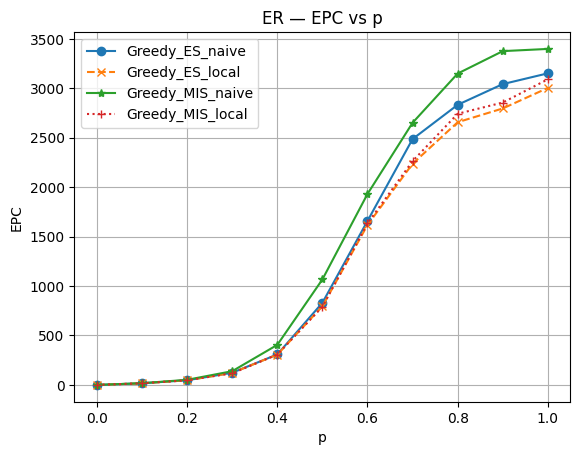

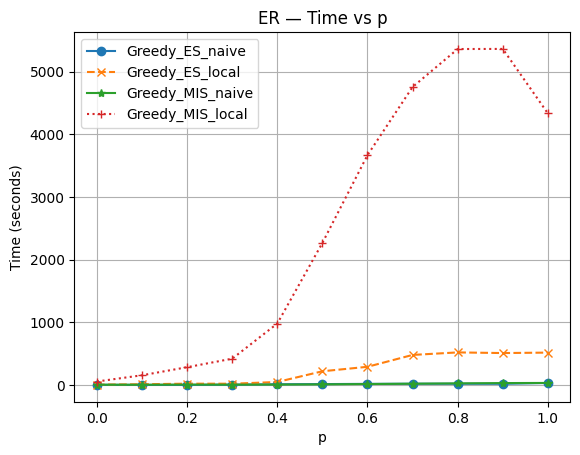

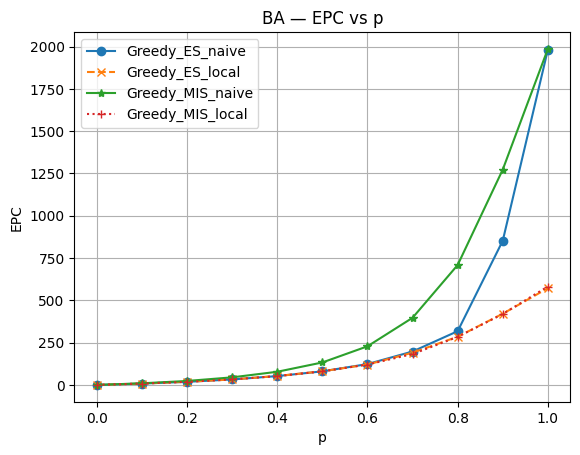

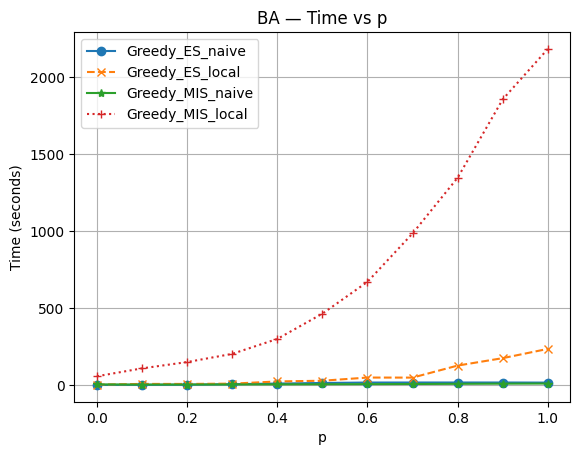

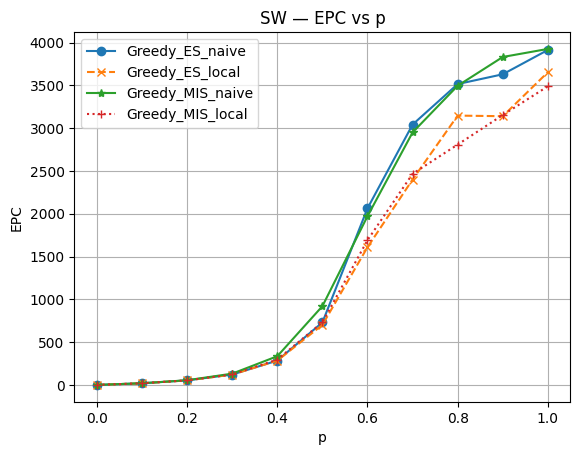

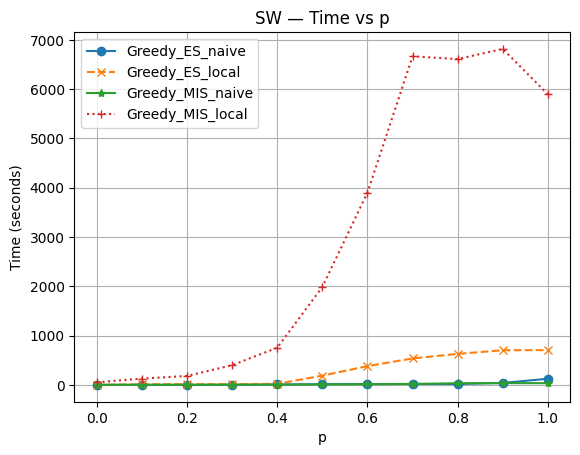

In [22]:
ROOT_PATH = r"C:\Users\btugu\Documents\develop\SCNDP\src\notebooks\Greedy_heuristics\final\results\notebook\plots"

sub_path = r"greedy_onlys"
suffix = "greedy_onlys"

import os

os.makedirs(os.path.join(ROOT_PATH, sub_path), exist_ok=True)

selected_algos = [
    # "Degree-based",
    # "REGA",
    # "PageRank",
    "Greedy_ES_naive",
    "Greedy_ES_local", 
    # "Betweenness",
    "Greedy_MIS_naive",
    "Greedy_MIS_local"
    ]

marker_map = {
    "Degree-based":    "x",
    "REGA":          "o",
    "Pagerank":      "*",
    "Betweenness":   "+",

    "Greedy_ES_local": "x",
    "Greedy_MIS_local": "+",
    "Greedy_ES_naive": "o",
    "Greedy_MIS_naive": "*",
}

linestyle_map = {
    "Degree-based":  ":",
    "REGA":          "--",
    "Pagerank":      "-.",
    "Betweenness":   "-",
    "Greedy_MIS_local": ":",
    "Greedy_ES_naive": '-',
    "Greedy_MIS_naive": '-',
    "Greedy_ES_local": '--',
}


for name in ["ER","BA","SW"]:
    df_m = final_df[final_df.model==name]
    plt.figure()
    for algo in selected_algos:
        sub = df_m[df_m.algo==algo]
        m = marker_map.get(algo, "o")         # default to 'o' if missing
        ls = linestyle_map.get(algo, "-")     # default to solid
        plt.plot(
            sub.p, sub.epc,
            marker=m,
            linestyle=ls,
            label=algo,
            markersize=6,    # tweak as you like
            linewidth=1.5
        )
    plt.title(f"{name} — EPC vs p")
    plt.xlabel("p"); plt.ylabel("EPC")
    plt.grid(True)
    plt.legend()
    plt.savefig(f"{ROOT_PATH}/{sub_path}/{name}_epc_vs_p_{suffix}.png")
    plt.show()

    for algo in selected_algos:
        sub = df_m[df_m.algo==algo]
        m = marker_map.get(algo, "o")         # default to 'o' if missing
        ls = linestyle_map.get(algo, "-")     # default to solid
        plt.plot(
            sub.p, sub.time,
            marker=m,
            linestyle=ls,
            label=algo,
            markersize=6,    # tweak as you like
            linewidth=1.5
        )
    plt.title(f"{name} — Time vs p")
    plt.xlabel("p"); plt.ylabel("Time (seconds)")
    plt.grid(True)
    plt.legend()
    plt.savefig(f"{ROOT_PATH}/{sub_path}/{name}_time_vs_p_{suffix}.png")
    plt.show()

In [23]:
path1 = r"C:\Users\btugu\Documents\develop\SCNDP\src\notebooks\Greedy_heuristics\final\Result_heuristics_all_ER_100_10_greedies_opt_dynamic.csv"
path2 = r"C:\Users\btugu\Documents\develop\SCNDP\src\notebooks\Greedy_heuristics\final\Result_heuristics_all_BA_100_10_greedies_opt_dynamic.csv"
path3 = r"C:\Users\btugu\Documents\develop\SCNDP\src\notebooks\Greedy_heuristics\final\Result_heuristics_all_SW_100_10_greedies_opt_dynamic.csv"

df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)
df3 = pd.read_csv(path3)

In [24]:
path4 = r"C:\Users\btugu\Documents\develop\SCNDP\src\notebooks\Greedy_heuristics\final\results\notebook\csv\Result_heuristics_all_ER_100_10_dynamic.csv"
path5 = r"C:\Users\btugu\Documents\develop\SCNDP\src\notebooks\Greedy_heuristics\final\results\notebook\csv\Result_heuristics_all_BA_100_10_dynamic.csv"
path6 = r"C:\Users\btugu\Documents\develop\SCNDP\src\notebooks\Greedy_heuristics\final\results\notebook\csv\Result_heuristics_all_SW_100_10_dynamic.csv"

df4 = pd.read_csv(path4)
df5 = pd.read_csv(path5)
df6 = pd.read_csv(path6)

In [26]:
final_df = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=False)
final_df.to_csv("Final_dynamic_all.csv", index=False)
final_df

,model,name_dist,algo,time,epc,epc_std
0,ER,uniform,Greedy_ES_initial,27.963285,1088.439697,0.000000
1,ER,uniform,Greedy_ES_final,269.168423,835.492050,0.000000
2,ER,uniform,Greedy_MIS_initial,8.275813,1083.921570,28.556782
3,ER,uniform,Greedy_MIS_final,2278.671438,851.524380,35.835116
4,ER,normal,Greedy_ES_initial,13.306965,857.996521,0.000000
...,...,...,...,...,...,...
13,SW,beta,Betweenness,0.019040,105.151950,NaN
14,SW,beta,PageRank,0.003297,108.011250,NaN
15,SW,beta,Greedy_ES,4.031471,81.285301,NaN
16,SW,beta,Greedy_MIS,504.059999,87.570900,NaN


In [30]:
name_map = {
  'Greedy_MIS_final': 'Greedy_MIS_local',
  'Greedy_ES_final':  'Greedy_ES_local',
  'Greedy_MIS_initial': 'Greedy_MIS_naive',
  'Greedy_ES_initial':  'Greedy_ES_naive',
}

final_df['algo'] = final_df['algo'].replace(name_map)

final_df.to_csv("Final_df_local_opt_REGA.csv", index=False)
final_df.algo.unique()

array(['Greedy_ES_naive', 'Greedy_ES_local', 'Greedy_MIS_naive',
       'Greedy_MIS_local', 'Degree-based', 'Betweenness', 'PageRank',
       'Greedy_ES', 'Greedy_MIS', 'REGA'], dtype=object)

In [31]:
final_df.to_csv("Final_dynamic_all.csv", index=False)

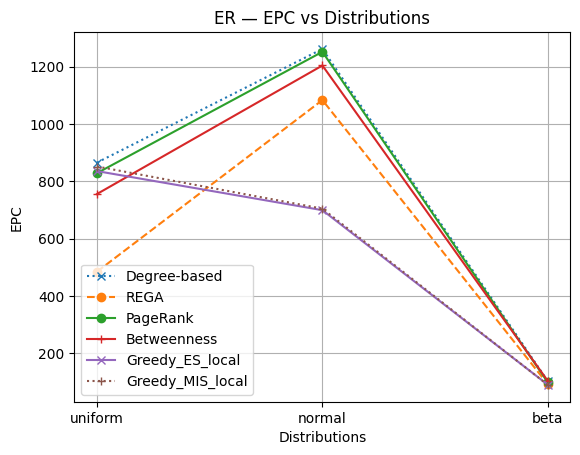

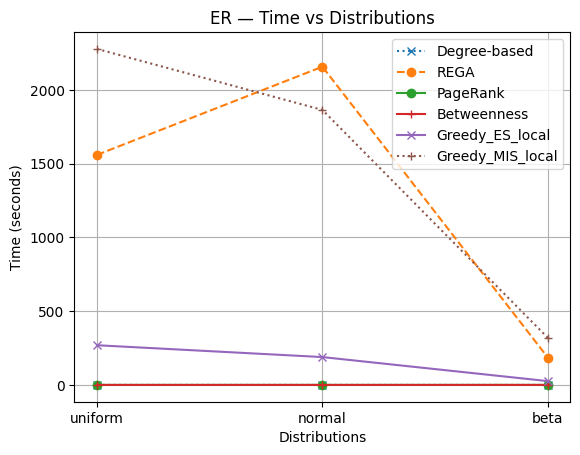

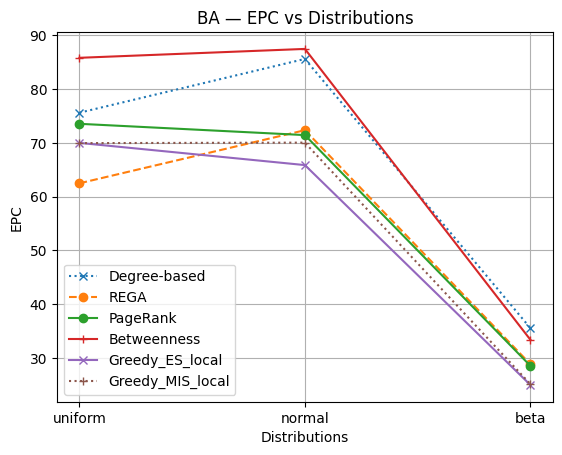

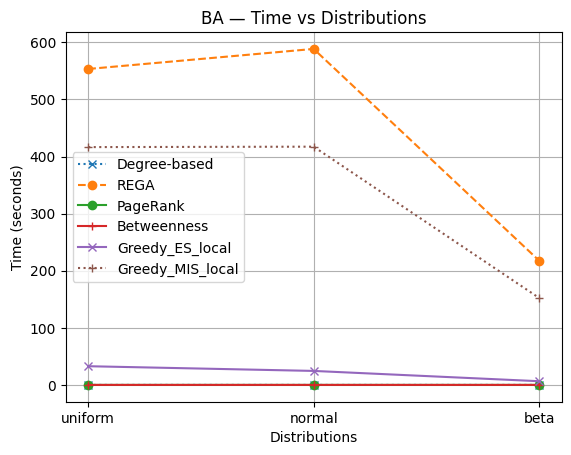

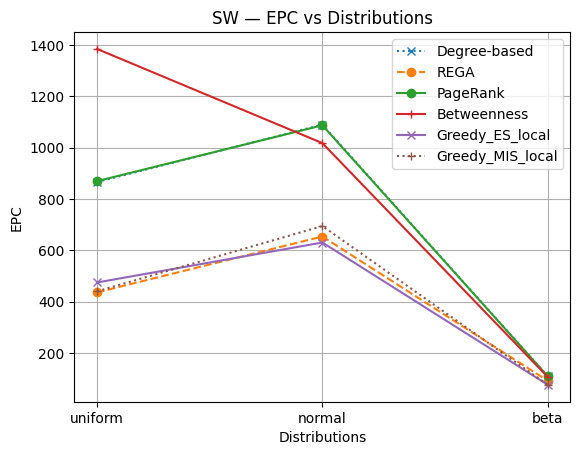

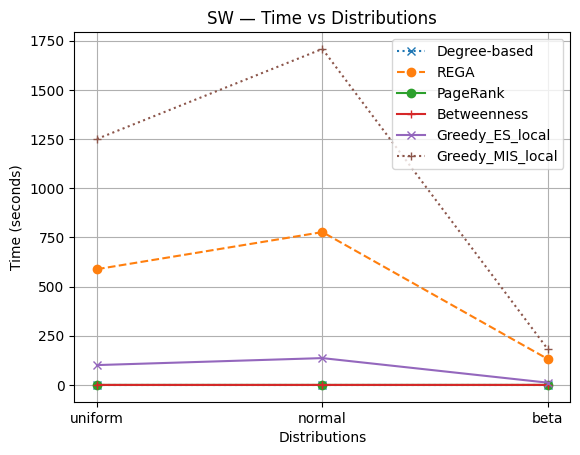

In [33]:
ROOT_PATH = r"C:\Users\btugu\Documents\develop\SCNDP\src\notebooks\Greedy_heuristics\final\results\notebook\plots"

sub_path = r"dynamic_all"
suffix = "dynamic_all"

import os

os.makedirs(os.path.join(ROOT_PATH, sub_path), exist_ok=True)

selected_algos = [
    "Degree-based",
    "REGA",
    "PageRank",
    "Betweenness",
    # "Greedy_ES_naive",
    # "Greedy_MIS_naive",
    "Greedy_ES_local", 
    "Greedy_MIS_local"
    ]

marker_map = {
    "Degree-based":    "x",
    "REGA":          "o",
    "Pagerank":      "*",
    "Betweenness":   "+",

    "Greedy_ES_local": "x",
    "Greedy_MIS_local": "+",
    "Greedy_ES_naive": "o",
    "Greedy_MIS_naive": "*",
}

linestyle_map = {
    "Degree-based":  ":",
    "REGA":          "--",
    "Pagerank":      "-.",
    "Betweenness":   "-",
    "Greedy_MIS_local": ":",
    "Greedy_ES_local": '-',
    "Greedy_ES_naive": '-',
    "Greedy_MIS_naive": '-',
}


for name in ["ER","BA","SW"]:
    df_m = final_df[final_df.model==name]
    plt.figure()
    for algo in selected_algos:
        sub = df_m[df_m.algo==algo]
        m = marker_map.get(algo, "o")         # default to 'o' if missing
        ls = linestyle_map.get(algo, "-")     # default to solid
        plt.plot(
            sub.name_dist, sub.epc,
            marker=m,
            linestyle=ls,
            label=algo,
            markersize=6,    # tweak as you like
            linewidth=1.5
        )
    plt.title(f"{name} — EPC vs Distributions")
    plt.xlabel("Distributions"); plt.ylabel("EPC")
    plt.grid(True)
    plt.legend()
    plt.savefig(f"{ROOT_PATH}/{sub_path}/{name}_epc_vs_p_{suffix}.png")
    plt.show()

    for algo in selected_algos:
        sub = df_m[df_m.algo==algo]
        m = marker_map.get(algo, "o")         # default to 'o' if missing
        ls = linestyle_map.get(algo, "-")     # default to solid
        plt.plot(
            sub.name_dist, sub.time,
            marker=m,
            linestyle=ls,
            label=algo,
            markersize=6,    # tweak as you like
            linewidth=1.5
        )
    plt.title(f"{name} — Time vs Distributions")
    plt.xlabel("Distributions"); plt.ylabel("Time (seconds)")
    plt.grid(True)
    plt.legend()
    plt.savefig(f"{ROOT_PATH}/{sub_path}/{name}_time_vs_p_{suffix}.png")
    plt.show()

In [39]:
path1 = r"C:\Users\btugu\Documents\develop\SCNDP\src\notebooks\Greedy_heuristics\final\dense\Result_heuristics_all_ER_50_5_greedies_opt_dense_graph.csv"
path2 = r"C:\Users\btugu\Documents\develop\SCNDP\src\notebooks\Greedy_heuristics\final\dense\Result_heuristics_all_BA_50_5_greedies_opt_dense_graph.csv"
path3 = r"C:\Users\btugu\Documents\develop\SCNDP\src\notebooks\Greedy_heuristics\final\dense\Result_heuristics_all_SW_50_5_greedies_opt_dense_graph.csv"

df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)
df3 = pd.read_csv(path3)

In [40]:
path4 = r"C:\Users\btugu\Documents\develop\SCNDP\src\notebooks\Greedy_heuristics\final\dense\Result_heuristics_all_ER_50_5_heuristics_REGA_dense.csv"
path5 = r"C:\Users\btugu\Documents\develop\SCNDP\src\notebooks\Greedy_heuristics\final\dense\Result_heuristics_all_BA_50_5_heuristics_REGA_dense.csv"
path6 = r"C:\Users\btugu\Documents\develop\SCNDP\src\notebooks\Greedy_heuristics\final\dense\Result_heuristics_all_SW_50_5_heuristics_REGA_dense.csv"

df4 = pd.read_csv(path4)
df5 = pd.read_csv(path5)
df6 = pd.read_csv(path6)

In [41]:
final_df = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=False)
final_df['epc_std'] = 0.0
final_df

,model,p,algo,time,epc,epc_std
0,ER,0.0,Greedy_ES_initial,1.153436,0.000000,0.0
1,ER,0.0,Greedy_ES_final,1.661097,0.000000,0.0
2,ER,0.0,Greedy_MIS_initial,1.117466,0.000000,0.0
3,ER,0.0,Greedy_MIS_final,16.435746,0.000000,0.0
4,ER,0.2,Greedy_ES_initial,13.554472,963.262329,0.0
...,...,...,...,...,...,...
19,SW,0.8,REGA,197.803440,990.000000,0.0
20,SW,1.0,Degree-based,0.001130,990.000000,0.0
21,SW,1.0,Betweenness,0.005780,990.000000,0.0
22,SW,1.0,PageRank,0.002085,990.000000,0.0


In [43]:
name_map = {
  'Greedy_MIS_final': 'Greedy_MIS_local',
  'Greedy_ES_final':  'Greedy_ES_local',
  'Greedy_MIS_initial': 'Greedy_MIS_naive',
  'Greedy_ES_initial':  'Greedy_ES_naive',
}

final_df['algo'] = final_df['algo'].replace(name_map)

final_df.to_csv("Final_df_local_opt_REGA.csv", index=False)
final_df.algo.unique()


array(['Greedy_ES_naive', 'Greedy_ES_local', 'Greedy_MIS_naive',
       'Greedy_MIS_local', 'Degree-based', 'Betweenness', 'PageRank',
       'REGA'], dtype=object)

In [44]:
final_df.to_csv("Dense_final_all.csv", index=False)

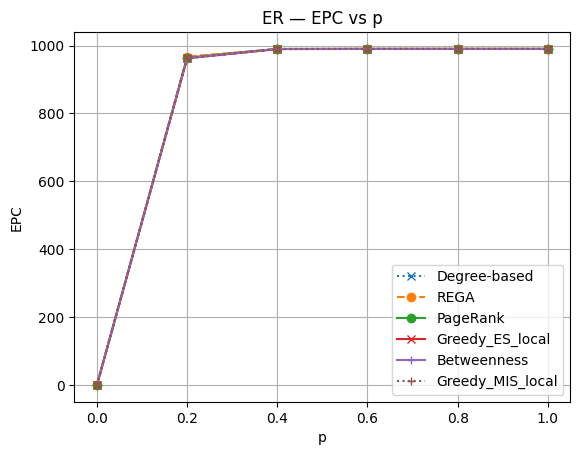

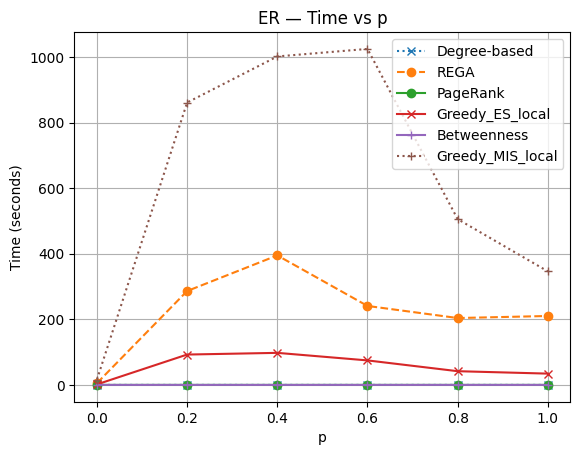

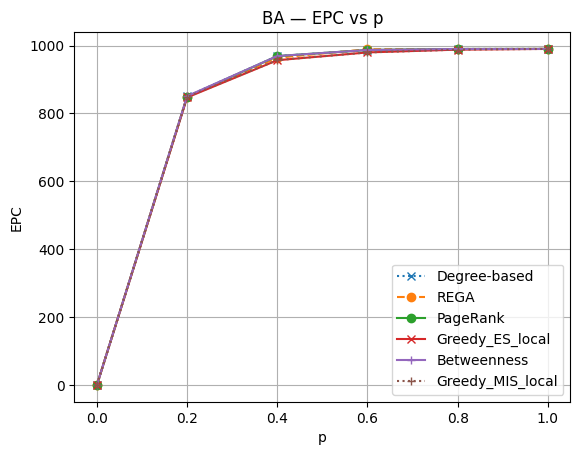

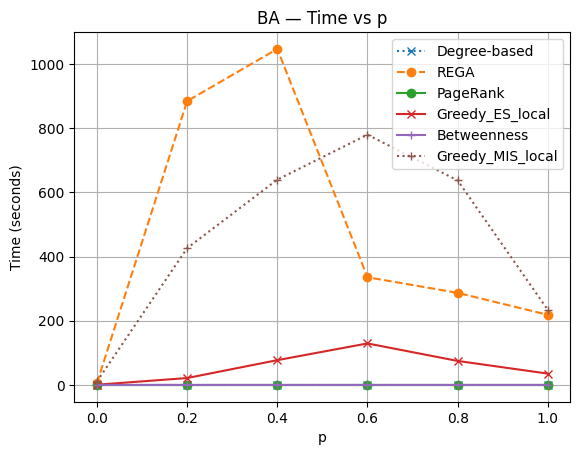

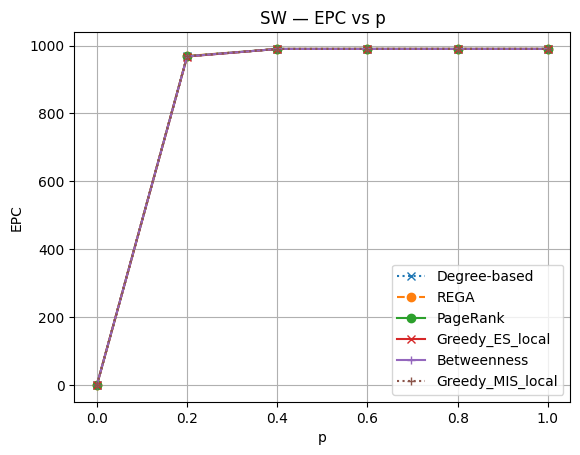

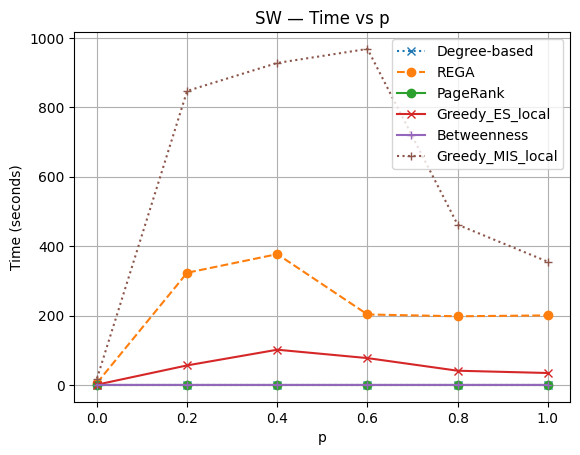

In [45]:
ROOT_PATH = r"C:\Users\btugu\Documents\develop\SCNDP\src\notebooks\Greedy_heuristics\final\results\notebook\plots"

sub_path = r"dense"
suffix = "dense"

import os

os.makedirs(os.path.join(ROOT_PATH, sub_path), exist_ok=True)

selected_algos = [
    "Degree-based",
    "REGA",
    "PageRank",
    # "Greedy_ES_naive",
    "Greedy_ES_local", 
    "Betweenness",
    # "Greedy_MIS_naive",
    "Greedy_MIS_local"
    ]

marker_map = {
    "Degree-based":    "x",
    "REGA":          "o",
    "Pagerank":      "*",
    "Betweenness":   "+",

    "Greedy_ES_local": "x",
    "Greedy_MIS_local": "+",
    "Greedy_ES_naive": "o",
    "Greedy_MIS_naive": "*",
}

linestyle_map = {
    "Degree-based":  ":",
    "REGA":          "--",
    "Pagerank":      "-.",
    "Betweenness":   "-",
    "Greedy_MIS_local": ":",
    "Greedy_ES_local": '-',
    "Greedy_ES_naive": '-',
    "Greedy_MIS_naive": '-',
}


for name in ["ER","BA","SW"]:
    df_m = final_df[final_df.model==name]
    plt.figure()
    for algo in selected_algos:
        sub = df_m[df_m.algo==algo]
        m = marker_map.get(algo, "o")         # default to 'o' if missing
        ls = linestyle_map.get(algo, "-")     # default to solid
        plt.plot(
            sub.p, sub.epc,
            marker=m,
            linestyle=ls,
            label=algo,
            markersize=6,    # tweak as you like
            linewidth=1.5
        )
    plt.title(f"{name} — EPC vs p")
    plt.xlabel("p"); plt.ylabel("EPC")
    plt.grid(True)
    plt.legend()
    plt.savefig(f"{ROOT_PATH}/{sub_path}/{name}_epc_vs_p_{suffix}.png")
    plt.show()

    for algo in selected_algos:
        sub = df_m[df_m.algo==algo]
        m = marker_map.get(algo, "o")         # default to 'o' if missing
        ls = linestyle_map.get(algo, "-")     # default to solid
        plt.plot(
            sub.p, sub.time,
            marker=m,
            linestyle=ls,
            label=algo,
            markersize=6,    # tweak as you like
            linewidth=1.5
        )
    plt.title(f"{name} — Time vs p")
    plt.xlabel("p"); plt.ylabel("Time (seconds)")
    plt.grid(True)
    plt.legend()
    plt.savefig(f"{ROOT_PATH}/{sub_path}/{name}_time_vs_p_{suffix}.png")
    plt.show()

In [59]:
comp_df = pd.read_csv(r"C:\Users\btugu\Documents\develop\SCNDP\src\notebooks\Greedy_heuristics\final\results\notebook\Comparision_ER_50_5_ES_vs_CELF.csv")
comp_df

,model,p,algo,time,epc
0,ER,0.0,Greedy_ES,56.378808,0.000000
1,ER,0.0,Greedy_ES_celf,0.143571,0.000000
2,ER,0.1,Greedy_ES,69.282874,3.387375
3,ER,0.1,Greedy_ES_celf,0.170425,3.396600
4,ER,0.2,Greedy_ES,69.955306,7.459425
5,ER,0.2,Greedy_ES_celf,0.278503,7.392825
6,ER,0.3,Greedy_ES,82.573187,12.393225
7,ER,0.3,Greedy_ES_celf,0.269831,12.446100
8,ER,0.4,Greedy_ES,110.905806,18.736200
9,ER,0.4,Greedy_ES_celf,0.716044,18.862200


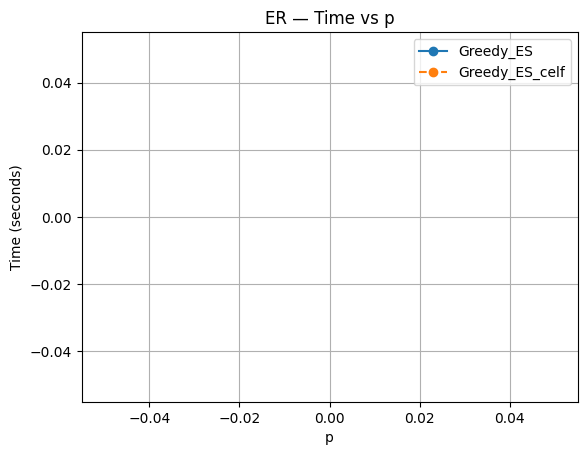

In [ ]:


ROOT_PATH = r"C:\Users\btugu\Documents\develop\SCNDP\src\notebooks\Greedy_heuristics\final\results\notebook\plots"

sub_path = r"comparision"
suffix = "comparision"

import os

os.makedirs(os.path.join(ROOT_PATH, sub_path), exist_ok=True)

selected_algos = [
    "Greedy_ES",
    "Greedy_ES_celf",
    ]

marker_map = {


    "Greedy_ES_": "o",
    "Greedy_ES_celf": "o"
}

linestyle_map = {
    "Greedy_ES_": "-",
    "Greedy_ES_celf": "--"
}


for name in ["ER"]:
    df_m = final_df[final_df.model==name]
    plt.figure()
    for algo in selected_algos:
        sub = df_m[df_m.algo==algo]
        m = marker_map.get(algo, "o")         # default to 'o' if missing
        ls = linestyle_map.get(algo, "-")     # default to solid
        plt.plot(
            sub.p, sub.time,
            marker=m,
            linestyle=ls,
            label=algo,
            markersize=6,    # tweak as you like
            linewidth=1.5
        )
    plt.title(f"{name} — Time vs p")
    plt.xlabel("p"); plt.ylabel("Time (seconds)")
    plt.grid(True)
    plt.legend()
    plt.savefig(f"{ROOT_PATH}/{sub_path}/{name}_time_vs_p_{suffix}.png")
    plt.show()

In [46]:
def component_sampling_epc_mc(G, S, num_samples=10_000,
                              epsilon=None, delta=None, use_tqdm=False):
  """
  Theoretic bounds: compute N = N(epsilon, delta) by the theoretical bound.
  Experimentation:  Otherwise, use the N as input for sample count.
  """

  # Surviving vertex set and its size
  V_remaining = set(G.nodes()) - S
  n_rem = len(V_remaining)

  # base case
  if n_rem < 2:
    return 0.0

  if num_samples is None:
    assert epsilon is not None and delta is not None
    P_E = sum(G.edges[u, v]['p'] for u, v in G.edges())
    coeff = 4 * (math.e - 2) * math.log(2 / delta)
    num_samples = math.ceil(coeff * n_rem * (n_rem - 1) /
                            (epsilon ** 2 * P_E))

  C2 = 0
  it = tqdm(range(num_samples), desc='Component sampling',
            total=num_samples) if use_tqdm else range(num_samples)

  for _ in it:
    u = random.choice(tuple(V_remaining))

    # BFS based on edge probabilities

    visited = {u}
    queue = [u]

    while queue:

      v = queue.pop()
      for w in G.neighbors(v):

        # flip a coin biased by the edge probability
        # w not in deleted nodes
        if w in V_remaining and random.random() < G.edges[v, w]['p']:

          # if w is not visited
          if w not in visited:
              visited.add(w)
              queue.append(w)

    # component counting
    C2 += (len(visited) - 1)

  return (n_rem * C2) / (2 * num_samples)

In [50]:
def sigma_exact(
    G: nx.Graph,
    S: set,
    use_tqdm: bool = False
) -> int:
    from itertools import product
    edges = list(G.edges())
    total_conn = 0.0

    for state in product([0,1], repeat=len(edges)):
        p_state = 1
        Gp = nx.Graph()
        Gp.add_nodes_from(set(G.nodes())-S)

        for (e, keep) in zip(edges, state):
            p_edge = G.edges[e]['p']
            p_state *= (p_edge if keep else (1-p_edge))

            if keep and e[0] not in S and e[1] not in S:
                Gp.add_edge(*e)

        # count connected i<j pairs in Gp−S
        for i,j in combinations(set(G.nodes())-S, 2):
            if nx.has_path(Gp, i, j):
                total_conn += p_state

    return total_conn

In [52]:
def greedy_cndp_epc(
    G: nx.Graph,
    K: int,
    num_samples: int = 10000,
    exact: bool = False,
    use_tqdm: bool = False
) -> set:
  """
  Algorithm 2 from the paper: Greedy selection of S |S| <= K
  to minimize sigma(S) via sigma_monte_carlo().

  Returns the list S (in pick order).
  """

  # S <= {Empty set} init
  S = set()

  Sigma_delta = []
  # Current sigma(S) for the empty set
  sigma_S = 0
  if exact:
    sigma_S = sigma_exact(G, S)
  else:
    sigma_S = component_sampling_epc_mc(G, S, num_samples=num_samples)

  Sigma_delta.append(sigma_S)
  # print(f"Initial sigma(S): {sigma_S}")

  if use_tqdm:
    it = tqdm(range(K), desc='Greedy selection', total=K)
  else:
    it = range(K)

  # Greedily select K nodes
  for _ in it:
    # inits
    best_j = None
    best_gain = -float('inf')
    best_sigma = None

    # find v maximizing gain sigma(S) - sigma(S ∪ j)
    for j in G:
      # Skip if j is already in S to avoid redundant calculations
      # j ∈ S
      if j in S:
        continue

      # S ∪ j = S + {j}
      if exact:
        sigma_Sj = sigma_exact(G, S | {j})
      else:
        sigma_Sj = component_sampling_epc_mc(G, S | {j}, num_samples=num_samples)

      gain = sigma_S - sigma_Sj

      # j <= argmax_{j ∈ V\S} (sigma(S) - sigma(S ∪ j))

      if gain > best_gain:
        best_gain = gain
        best_j = j
        best_sigma = sigma_Sj


    # add the best node
    if best_j is None:
      break

    S.add(best_j)
    sigma_S = best_sigma

    Sigma_delta.append(best_sigma)
    # print(f"Selected node {best_j}, gain: {best_gain}, new sigma(S): {sigma_S}")

  return S, Sigma_delta

In [ ]:
def greedy_cndp_epc_celf(G, K, num_samples=10000, return_trace=False):
    nodes = list(G.nodes())
    n     = len(nodes)

    S = set()  # the set of deleted nodes
    # 1) initial EPC
    curr_sigma = component_sampling_epc_mc(G, S, num_samples)

    # 2) build heap of initial gains
    pq = []  # elements are (neg_gain, index, stamp)
    for i, v in enumerate(nodes):
        gain = curr_sigma - component_sampling_epc_mc(G, {v}, num_samples)
        heapq.heappush(pq, (-gain, i, 0))

    trace = [curr_sigma] if return_trace else None
    stamp = 0

    # 3) CELF loop
    while len(S) < K and pq:
        neg_gain, i, last_stamp = heapq.heappop(pq)
        v = nodes[i]

        if last_stamp == stamp:
            # up‐to‐date → accept
            S.add(v)
            curr_sigma += neg_gain  # since neg_gain == –Δ
            stamp += 1
            if return_trace:
                trace.append(curr_sigma)

        else:
            # stale → recompute Δ = curr_sigma – σ(S ∪ {v})
            new_gain = curr_sigma - component_sampling_epc_mc(G, S | {v}, num_samples)
            heapq.heappush(pq, (-new_gain, i, stamp))

    return (S, trace) if return_trace else S

In [56]:
K = 5
NODES = 50
N_SAMPLE = 100_000

# nodes 100, edges 200
graph_models = {
  'ER': nx.erdos_renyi_graph(NODES, 0.0443, seed=42),
}

for name, G in tqdm(graph_models.items(), desc="Processing models", total=len(graph_models)):
  records = []
  for p in tqdm(np.arange(0.0, 1.1, 0.1), desc="Processing", total=int(1.1/0.1)):

    def fresh_graph():
      H = G.copy()
      for u, v in H.edges():
        H[u][v]['p'] = p
      return H
 
    t0 = time.perf_counter()
    G_greedy_es, sigma_delta_celf  = greedy_cndp_epc_celf(
      G=fresh_graph(), 
      K=K,
      num_samples=N_SAMPLE,
      return_trace=True
      )
    t_greedy_es_celf  = time.perf_counter() - t0
    epc_greedy_es_celf = sigma_delta_celf[-1]

    t0 = time.perf_counter()
    G_greedy_es, sigma_delta1  = greedy_cndp_epc(
      G=fresh_graph(), 
      K=K,
      num_samples=N_SAMPLE,
      )
    t_greedy_es  = time.perf_counter() - t0
    epc_greedy_es = sigma_delta1[-1]

    # print(f"\n{name} - {p} Betweenness: {epc_between}\n")
    print(f"\n{name} - {p} Greedy_ES: {epc_greedy_es}\n")
    print(f"\n{name} - {p} Greedy_ES_non: {epc_greedy_es_celf}\n")

    for algo, t, epc in [
      # ('Degree-based', t_degree, epc_degree),
      # ('Betweenness', t_between, epc_between),
      # ('PageRank', t_pagerank, epc_pagerank),
      ('Greedy_ES', t_greedy_es, epc_greedy_es),
      ('Greedy_ES_celf', t_greedy_es_celf, epc_greedy_es_celf),
      # ('REGA', t_rega, epc_rega),      
    ]:
      
      records.append({
        'model': name,
        'p': p,
        'algo': algo,
        'time': t,
        'epc': epc,
      })

    df = pd.DataFrame(records)
    df.to_csv(f"Comparision_{name}_{NODES}_{K}_ES_vs_CELF.csv", index=False)

Processing models:   0%|          | 0/1 [00:00<?, ?it/s]


ER - 0.0 Greedy_ES: 0.0


ER - 0.0 Greedy_ES_non: 0.0




ER - 0.1 Greedy_ES: 3.387375


ER - 0.1 Greedy_ES_non: 3.3966000080108643




ER - 0.2 Greedy_ES: 7.459425


ER - 0.2 Greedy_ES_non: 7.392825126647949




ER - 0.30000000000000004 Greedy_ES: 12.393225


ER - 0.30000000000000004 Greedy_ES_non: 12.446100234985352




ER - 0.4 Greedy_ES: 18.7362


ER - 0.4 Greedy_ES_non: 18.862199783325195




ER - 0.5 Greedy_ES: 26.273475


ER - 0.5 Greedy_ES_non: 26.38665008544922




ER - 0.6000000000000001 Greedy_ES: 35.055


ER - 0.6000000000000001 Greedy_ES_non: 35.15625




ER - 0.7000000000000001 Greedy_ES: 46.048275


ER - 0.7000000000000001 Greedy_ES_non: 46.323448181152344




ER - 0.8 Greedy_ES: 65.811375


ER - 0.8 Greedy_ES_non: 59.89612579345703




ER - 0.9 Greedy_ES: 82.8306


ER - 0.9 Greedy_ES_non: 85.22370147705078



Processing models: 100%|██████████| 1/1 [43:24<00:00, 2604.56s/it]


ER - 1.0 Greedy_ES: 126.0414


ER - 1.0 Greedy_ES_non: 159.6021728515625

